# Divergence and Deviance

##### Keywords: KL-Divergence, Jensen's inequality, likelihood, log-likelihood, deviance, entropy, cross-entropy, likelihood-ratio, probabilistic modeling

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Contents
{:.no_toc}
* 
{: toc}

$$ \newcommand{\kld}{\mathcal{D}_{KL}}$$

## Kullback-Leibler (KL) Divergence
Let's dive right in with a definition and then pick it apart:

$$\kld(P, Q) = E_p[log(p/q)] = \sum_i p_i log(\frac{p_i}{q_i}) \,\,or\, \int_x log(\frac{p(x)}{q(x)})dP$$

To get a more interpretable form, let's break up the logarithm, and write out the integral:  

$$\kld(P, Q) = \sum_i p_i[log(p_i)-log(q_i)]$$
$$\kld(P, Q) = \sum_i p_i[-log(q_i)-(-log(p_i))]$$
$$\kld(P, Q) = \sum_i p_i[S(q_i)-S(p_i)]$$

We've intrduced S() as the surprise or difficulty of guessing a particular event (the negative log of the probability, per the Entropy notebook).

#### Basics
This form makes the interpretation behind KL clearest: we have some distribution P(x). We visit every point of that distribution and measure how much excess surprise the distribution Q(x) experiences, averaged across all such points. So distributions Q which assign low probablility to points that are common under p get a large KL value. KL is smallest when Q is exaclty P and the score function is zero everywhere.


#### Non-symmetric
Note that $\kld(p, q)$ does not equal $\kld(q,p)$, since the roles of Q and P are not symmetric. P comes second in the subtraction, and multiplies the subtraction. 

In an example, consider how the KL divergence for a standard normal distribution and a uniform distribution on [-1,1], i.e. how surprised each is by data generated by the other, in excess of the surprise inherent to the generating distribution. In one direction, the uniform distribution is EXTREMLEY surprised by data from the normal distribution. The uniform distribution thought that data outside [-1,1] was impossible, but the normal distribution produces it. In contrast, the normal distribution isn't terribly surprised to see values in the range [-1,1], but is more surprised than the uniform would be: the normal assigned lower probability to those values. Thus the KL divergences from P to Q and Q to P are definitely different.

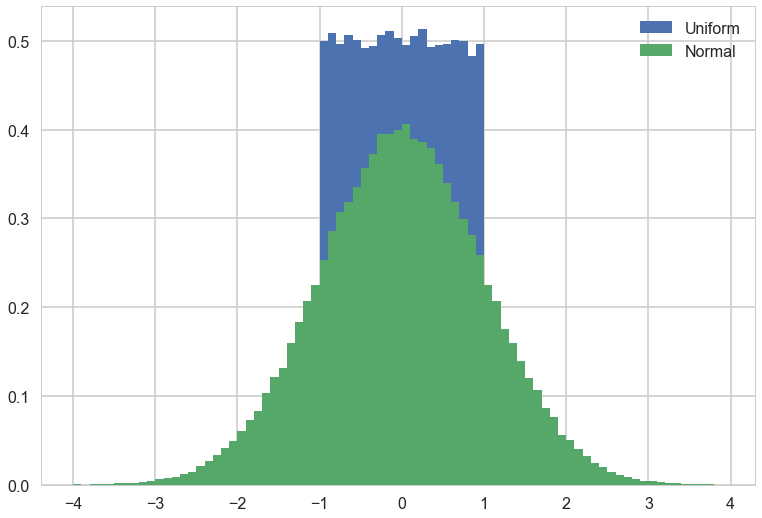

In [2]:
norm=np.random.normal(size=100000)
unif=2*(np.random.rand(100000)-.5)

plt.hist(unif, bins=np.arange(-4,4,.1), normed=True)
plt.hist(norm, bins=np.arange(-4,4,.1), normed=True)
plt.legend(["Uniform", "Normal"])
plt.show()

Caption: Yep, the standard normal distirbution assigns lower probabilites to [-1,1] than a uniform over the same points.

#### Summary
The KL divergence takes in a data-generating process P (so, a distribution over possible outcomes), and an alternative distribution Q. It tells us how much needless surprise we'd experience if we believed the data were generated by Q instead of by P.

While KL can be used as an abastract measure of the level of difference between two distributions, it's much better to think in terms of a true/assumed data generating distribution and an approximate alternative distribution.

#### Applications
In frequentist statistics, the KL-divergence is related to the maximum likelihood (both pick a model that minimizes surprise at the data). In Bayesian statistics the KL divergence can be used as a measure of the information gain in moving from a prior to posterior (with a common goal in Bayesian experimental design to maximise the expected KL divergence between the prior and the posterior). The divergence is also used to understand mutual information in clustering, and in variational bayesian inference.

### Comparing Models

We can use KL-Divergences of two different models to do model comparison. We want to pick the model whose KL divergence from the true data-generating distribution $P$ is as small as possible. If we work through the math,

$$\kld(P, Q) -\kld(P, R) = E_P[log(p)-log(q)] - E_P[log(p) - log(r)] \\= E_p[log(r) - log(q)] \\= E_p[log(\frac{r}{q})]$$

In the sample approximation we have:

$$\kld(P, Q) -\kld(P, R) = \frac{1}{N} \sum_i log(\frac{r_i}{q_i}) = \frac{1}{N} log(\frac{\prod_i r_i}{\prod_i q_i}) =  \frac{1}{N}log(\frac{\cal{L}_r}{\cal{L}_q})$$

So to pick the model with smaller KL divergence, we can pick the model with the larger likelihood. This should be comforting, as picking the lower-KL model ties to comparing likelihood ratios.

Those familar with statistics know that examining the likelihood ratios of two models is an extremely powerful means of testing them. (And likelihood ratio testing happens to be equivalent to saying "I'll reject a parameter setting if it generates M bits more surprise than the MLE (minimum surprise) estimate on the observed data; otherwise that parameter setting is plausible".

## Bonus material

### Another view: Cross Entropy

Cross-Entropy is defined as

$$H(P, Q) = - E_p[log(q)] = -\int log(q(x))\ p(x)dx$$

It measures the average surprise accumulated by Q across all points generated by P.

Since KL divergence is EXCESSS surprise, one can unsurprisingly write

$$\kld(p, q) = H(p,q) - H(p) $$


## Tie to Maximum Likelihood
We've already said that maximum likelihood picks distribution (among those available by tweaking the parameters) that is least surprised by the data. This is asympotically the same as picking the available distribution with lowest KL divergence from the true data generating process. (Intuitively, picking the distribution that is least surprised by the data [ML] is the same as picking the distribution that experiences least excess surprise [KL])

**Argument**:
$$\kld(P, Q) = E_P[log(p/q)] = E_P[-log(q)] - E_P[-log(p)] $$

The rightmost term is the entopy of the data generating process- nothing can be done about that it's just a fixed value set by how crazy the true data distribution is. Minimizing KL is the thus about minimizing the first term - minimizing the average surprise Q experiences across points generated by P.

However, we don't often have the true data distribution P (and if we did, we wouldn't need to approximate it with a model), we have samples from it. We hope, via LLN, and numerous enough samples that

$$\frac{1}{N}\sum_i -log(q_i) \rightarrow E_P[S(q)]$$

So, minimizing KL is about minimizing the term on the left. And the term on the left is the negative log likelihood with a 1/N in front, so [in the limit of large sample sizes] minimizing KL is the same as maximizing likelihood, and vice versa.


### Proof: KL is always positive, and 0 only if Q is the same as P

We can use Jensen's inequality for expectations on a convex function $f(x)$, 

$$ E[f(X)] \ge f(E[X]) $$

to show that $\kld(p,q) \ge 0$ with equality iff (if and only if) $q=p$.

$$\kld(p,q) = E_p[-log(q/p)] \ge -\log \left( E_p[q/p] \right)$$
$$= -\log(\int \frac{q(x)}{p(x)}p(x)\,dx) = -\log(\int q(x) dx) = 0$$

where we have used the fact that $-log(x)$ is a convex function, and that $q(x)$ normalizes to a distribution. Infact, since $-\log(x)$ is strictly convex, the equality only happens if $q(x) = p(x)$ for ALL x.